In [36]:
import stringAutomata
symbols = ['a','b']
# Returns an array of networkx graphs, all with minimized size nStates
dat = stringAutomata.generateRandomDataset(datasetSize=10000, maxTrials=1000, nStates=3, symbols=symbols)

0 / 1000  datasetSize: 0
100 / 1000  datasetSize: 93
200 / 1000  datasetSize: 183
300 / 1000  datasetSize: 259
400 / 1000  datasetSize: 334
500 / 1000  datasetSize: 404
600 / 1000  datasetSize: 462
700 / 1000  datasetSize: 518
800 / 1000  datasetSize: 558
900 / 1000  datasetSize: 603


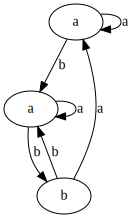

In [35]:
stringAutomata.nxToDot(dat[0])

In [5]:
# set up logging
import logging
logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
)

In [7]:
# save dataset
import cloudpickle
f = open("automataData.json", "wb")
cloudpickle.dump([stringAutomata.automataFromNetworkx(x, symbols) for x in dat], f)
f.close()
# load dataset
f = open("automataData.json", "rb")
automatas = [cloudpickle.load(f)
f.close()


In [33]:

dat.sort(key=lambda x:stringAutomata.automataFromNetworkx(x, symbols).complexity())
complexities = [stringAutomata.automataFromNetworkx(x, symbols).complexity() for x in dat]
set(complexities)

{3}

0


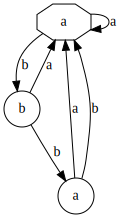

1


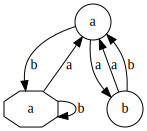

2


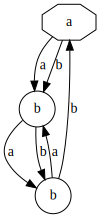

3


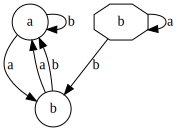

In [31]:

for i, n in enumerate(dat[:4]):
    print(i)
    display(stringAutomata.automataFromNetworkx(n, symbols).toDot())

In [45]:
import customDatasets
import minGPTOther
from minGPTOther.mingpt import trainer
from importlib import reload
import trainingUtil
reload(customDatasets)
reload(automataUtil)
reload(trainingUtil)
reload(automataUtil.automataBattle)
reload(trainingUtil.minGPTOther.mingpt.trainer)

<module 'minGPTOther.mingpt.trainer' from '/home/azureuser/openai_learning/minGPTOther/mingpt/trainer.py'>

In [48]:
class DoneTraining(Exception):
     pass
from customDatasets import AutomataDataset
def trainAutomata(automata, label):
    train_set = AutomataDataset(automata, label=label, symbols=symbols, split="train", sequenceLen=8)
    test_set = AutomataDataset(automata, label=label, symbols=symbols, split="test", sequenceLen=8)
    global finishedEpoch
    def trainCallback(epoch):
        global finishedEpoch
        trainAcc = train_set.runTest(trainingUtil.model, trainingUtil.trainer.device, showFailures=False)
        testAcc = test_set.runTest(trainingUtil.model, trainingUtil.trainer.device, showFailures=False)
        print("epoch", epoch, "train accuracy:", trainAcc)
        print("epoch", epoch, "test accuracy:", testAcc)
        if trainAcc == 1.0 and testAcc == 1.0:
            finishedEpoch = epoch
            raise DoneTraining()
    try:
        trainingUtil.trainTransformer(prevModel=None, train_dataset=train_set, test_dataset=test_set, n_layer=1, n_head=1, n_embd=64, lr=5e-4, trainCallback=trainCallback, showProgress=False, loadFromCheckpoint=False, useCuda=False)
    except DoneTraining as e:
        return finishedEpoch
        

In [ ]:
from collections import defaultdict
runs = defaultdict(lambda: [])
for i, g in enumerate(dat):
    automata = automataUtil.automataFromNetworkx(g, symbols)
    from IPython.display import clear_output
    clear_output(wait=True)
    display(automata.toDot())
    for _ in range(100):
        runs[i].append((trainAutomata(automata, i), trainingUtil.trainer.losses))

In [28]:
import logging
logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.ERROR,
)

In [61]:
import cloudpickle
f = open("resultRuns.json", "rb")
runsDict = cloudpickle.load(f)
f.close() 

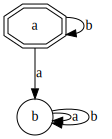

Sorted by avg epochs


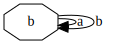

avg epochs 0.01 avg loss at epoch 0 1.4036058342456819 avg loss when fit 0.9353451192378998


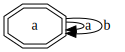

avg epochs 0.02 avg loss at epoch 0 1.3925223922729493 avg loss when fit 0.9185943812131881


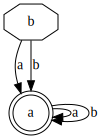

avg epochs 0.93 avg loss at epoch 0 1.3965786254405976 avg loss when fit 0.8911880993843079


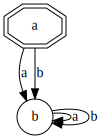

avg epochs 1.0 avg loss at epoch 0 1.3975653278827667 avg loss when fit 0.8985250204801559


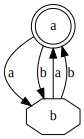

avg epochs 1.61 avg loss at epoch 0 1.387124490737915 avg loss when fit 0.9513023608922958


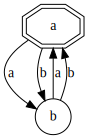

avg epochs 1.61 avg loss at epoch 0 1.401513180732727 avg loss when fit 0.9501019644737244


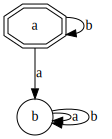

avg epochs 2.73 avg loss at epoch 0 1.4002061438560487 avg loss when fit 0.7947436776757241


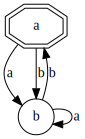

avg epochs 3.01 avg loss at epoch 0 1.398785378932953 avg loss when fit 0.8564903074502945


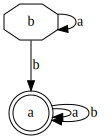

avg epochs 3.43 avg loss at epoch 0 1.3896378016471862 avg loss when fit 0.7640904745459557


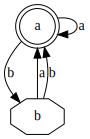

avg epochs 3.52 avg loss at epoch 0 1.401658388376236 avg loss when fit 0.8417020487785339


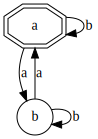

avg epochs 4.38 avg loss at epoch 0 1.3962756979465485 avg loss when fit 0.7864163091778755


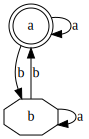

avg epochs 4.66 avg loss at epoch 0 1.3994489264488221 avg loss when fit 0.7718555393815041


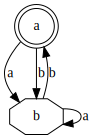

avg epochs 4.87 avg loss at epoch 0 1.3975611889362336 avg loss when fit 0.7624968060851097


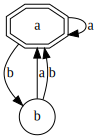

avg epochs 5.42 avg loss at epoch 0 1.3848290741443634 avg loss when fit 0.7236772906780243









Sorted by avg loss at epoch 0


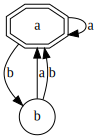

avg epochs 5.42 avg loss at epoch 0 1.3848290741443634 avg loss when fit 0.7236772906780243


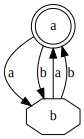

avg epochs 1.61 avg loss at epoch 0 1.387124490737915 avg loss when fit 0.9513023608922958


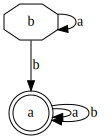

avg epochs 3.43 avg loss at epoch 0 1.3896378016471862 avg loss when fit 0.7640904745459557


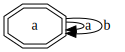

avg epochs 0.02 avg loss at epoch 0 1.3925223922729493 avg loss when fit 0.9185943812131881


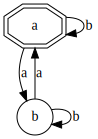

avg epochs 4.38 avg loss at epoch 0 1.3962756979465485 avg loss when fit 0.7864163091778755


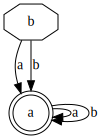

avg epochs 0.93 avg loss at epoch 0 1.3965786254405976 avg loss when fit 0.8911880993843079


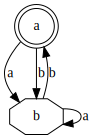

avg epochs 4.87 avg loss at epoch 0 1.3975611889362336 avg loss when fit 0.7624968060851097


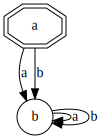

avg epochs 1.0 avg loss at epoch 0 1.3975653278827667 avg loss when fit 0.8985250204801559


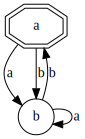

avg epochs 3.01 avg loss at epoch 0 1.398785378932953 avg loss when fit 0.8564903074502945


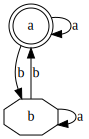

avg epochs 4.66 avg loss at epoch 0 1.3994489264488221 avg loss when fit 0.7718555393815041


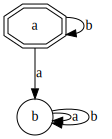

avg epochs 2.73 avg loss at epoch 0 1.4002061438560487 avg loss when fit 0.7947436776757241


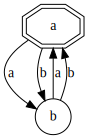

avg epochs 1.61 avg loss at epoch 0 1.401513180732727 avg loss when fit 0.9501019644737244


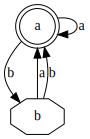

avg epochs 3.52 avg loss at epoch 0 1.401658388376236 avg loss when fit 0.8417020487785339


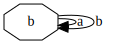

avg epochs 0.01 avg loss at epoch 0 1.4036058342456819 avg loss when fit 0.9353451192378998









Sorted by avg loss when fit


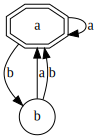

avg epochs 5.42 avg loss at epoch 0 1.3848290741443634 avg loss when fit 0.7236772906780243


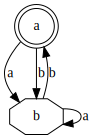

avg epochs 4.87 avg loss at epoch 0 1.3975611889362336 avg loss when fit 0.7624968060851097


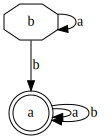

avg epochs 3.43 avg loss at epoch 0 1.3896378016471862 avg loss when fit 0.7640904745459557


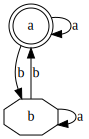

avg epochs 4.66 avg loss at epoch 0 1.3994489264488221 avg loss when fit 0.7718555393815041


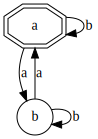

avg epochs 4.38 avg loss at epoch 0 1.3962756979465485 avg loss when fit 0.7864163091778755


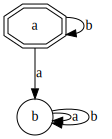

avg epochs 2.73 avg loss at epoch 0 1.4002061438560487 avg loss when fit 0.7947436776757241


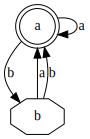

avg epochs 3.52 avg loss at epoch 0 1.401658388376236 avg loss when fit 0.8417020487785339


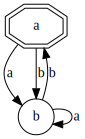

avg epochs 3.01 avg loss at epoch 0 1.398785378932953 avg loss when fit 0.8564903074502945


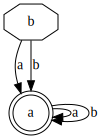

avg epochs 0.93 avg loss at epoch 0 1.3965786254405976 avg loss when fit 0.8911880993843079


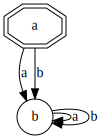

avg epochs 1.0 avg loss at epoch 0 1.3975653278827667 avg loss when fit 0.8985250204801559


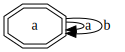

avg epochs 0.02 avg loss at epoch 0 1.3925223922729493 avg loss when fit 0.9185943812131881


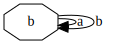

avg epochs 0.01 avg loss at epoch 0 1.4036058342456819 avg loss when fit 0.9353451192378998


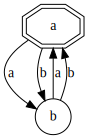

avg epochs 1.61 avg loss at epoch 0 1.401513180732727 avg loss when fit 0.9501019644737244


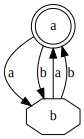

avg epochs 1.61 avg loss at epoch 0 1.387124490737915 avg loss when fit 0.9513023608922958


In [102]:
import torch
torch.nn.Softmax(dim=2)(trainingUtil.model(train_set[0][0].view(1,-1))[0])

tensor([[[7.4936e-06, 9.9998e-01, 4.9289e-06, 5.3432e-06],
         [7.2463e-06, 9.9998e-01, 5.3635e-06, 5.8364e-06],
         [6.2608e-06, 9.9998e-01, 5.6640e-06, 6.2363e-06],
         [5.8836e-06, 9.9998e-01, 6.4877e-06, 6.8828e-06],
         [6.3733e-06, 9.9998e-01, 5.3976e-06, 5.8442e-06],
         [6.5267e-06, 9.9998e-01, 5.2992e-06, 5.7880e-06],
         [7.5934e-06, 9.9998e-01, 6.0017e-06, 6.5992e-06],
         [6.7790e-06, 9.9998e-01, 5.4773e-06, 5.8620e-06],
         [9.9998e-01, 6.6221e-06, 5.7156e-06, 5.8478e-06],
         [9.9998e-01, 5.6271e-06, 6.2333e-06, 6.3348e-06]]],
       grad_fn=<SoftmaxBackward>)

In [132]:

accuracyTrain = train_set.runTest(trainingUtil.model, trainingUtil.trainer.device, showFailures=True)

In [133]:
accuracyTrain, accuracyTest

(1.0, 1.0)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0')
(tensor([[[ 2.4452,  2.4411, -4.7677, -4.9431],
         [-2.2675,  5.4352, -2.7703, -3.0515],
         [-2.8026,  5.3859, -2.4117, -2.4649],
         [-3.1059,  5.5942, -2.1737, -2.2790],
         [-3.0294,  5.5705, -2.3562, -2.4265],
         [-3.1786,  5.6418, -2.2012, -2.2581],
         [-2.5053,  5.5624, -2.3373, -2.4771],
         [-2.8720,  5.5478, -2.6701, -2.7022],
         [-2.6247,  5.5640, -2.5928, -2.7016]]], device='cuda:0',
       grad_fn=<UnsafeViewBackward>), None)
